In [ ]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
# Import libraries
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
# eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [ ]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
# eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Industrials

In [ ]:
# Industrials
for i in name.index:
  if "Industrials" not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)

In [ ]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
# eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [ ]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum())

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum())

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum())

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum())

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum())

48
0
0
0
0
0
0
0


In [ ]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [ ]:
# # Calculate NI
# ni = roa * ta

# Calculate Size
size = np.log(mv)

# # Calculate Leverage
# lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# # Calculate Net profit margin
# net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# # Calculate ROE
# roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
# ni.drop(ni.index[0], axis='index', inplace=True)
ocf.drop(ocf.index[0], axis='index', inplace=True)
size.drop(size.index[0], axis='index', inplace=True)
# lev.drop(lev.index[0], axis='index', inplace=True)
ppe.drop(ppe.index[0], axis='index', inplace=True)
liq.drop(liq.index[0], axis='index', inplace=True)
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True)
quick.drop(quick.index[0], axis='index', inplace=True)
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True)
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True)
dso.drop(dso.index[0], axis='index', inplace=True)
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True)
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True)
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True)
# net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True)
bep.drop(bep.index[0], axis='index', inplace=True)
# roe.drop(roe.index[0], axis='index', inplace=True)
roa.drop(roa.index[0], axis='index', inplace=True)
# eps.drop(eps.index[0], axis='index', inplace=True)
ccc.drop(ccc.index[0], axis='index', inplace=True)
gdp.drop(gdp.index[0], axis='index', inplace=True)
cpi.drop(cpi.index[0], axis='index', inplace=True)
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [ ]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

# cols=[]
# for j in range(len(ni.columns)):
#   for i in range(len(ni.index)):
#     if sales.iloc[i,j] < ni.iloc[i,j]:
#       cols.append(ni.columns[j])
#       break
# print(len(cols))


45
26


In [ ]:
roatb = roa.mean()
roatb = roatb.values
roatb = np.mean(roatb)
print(roatb)

0.05337402242344785


In [ ]:
# ROA > ROA TB --> Nhóm profit (có lợi nhuận ròng và dòng tiền dương từ hoạt động kd)
# ROA < ROA TB <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 152), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if roa.iloc[i,j] > roatb:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

      V21.HN  LIG.HN  VCM.HN  CX8.HN  HU1.HM  AME.HN  PDN.HM  PXI.HM  VE3.HN  BCE.HM  UDC.HM  LCS.HN  HHG.HN  VE2.HN  HMH.HN  PCT.HN  CVN.HN  WCS.HN  VOS.HM  SMA.HM  ARM.HN  KTT.HN  LM7.HN  LM8.HM  LCD.HN  PRC.HN  CMS.HN  VNF.HN  VAT.HN  HTI.HM  VSI.HM  ADC.HN  KST.HN  MDG.HM  PTD.HN  TSB.HN  C47.HM  DIH.HN  INC.HN  SVN.HN  L14.HN  PPE.HN  CTX.HN  FCN.HM  VE8.HN  VE4.HN  EMC.HM  DHP.HN  NDX.HN  KSQ.HN  CLL.HM  SKG.HM  TVC.HN  PEN.HN  AMD.HM  NCT.HM  HAH.HM  FID.HN  BCG.HM  PHP.HN  TA9.HN  VMS.HN  VSA.HN  SDT.HN  SJE.HN  HTP.HN  L18.HN  DXP.HN  GMD.HM  HTV.HM  HAS.HM  MHC.HM  CII.HM  REE.HM  TMS.HM  TYA.HM  RAL.HM  LGC.HM  SFI.HM  VGP.HN  SDC.HN  SDA.HN  S55.HN  PAC.HM  HBC.HM  SC5.HM  VNE.HM  C92.HN  VC6.HN  DQC.HM  PIT.HM  TJC.HN  L10.HM  VC7.HN  SD2.HN  HUT.HN  LUT.HN  VSC.HM  L62.HN  CJC.HN  CTB.HN  VC2.HN  TPH.HN  MCO.HN  SD9.HN  SIC.HN  SD5.HN  PTC.HM  VMC.HN  VNC.HN  SD6.HN  S99.HN  L43.HN  SD4.HN  TV4.HN  VNS.HM  VE1.HN  SSM.HN  L61.HN  QTC.HN  VCC.HN  ICG.HN  VC1.HN  DZM.HN  VN

In [ ]:
# # NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# # NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

# target = pd.DataFrame(np.random.randn(11, 152), columns=size.columns, index = size.index)
# for i in range(len(size.index)):
#   for j in range(len(size.columns)):
#     if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
#       target.iloc[i,j] = 1
#     else:
#       target.iloc[i,j] = 0
# print(target.to_string())

In [ ]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
# data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
# data['Net profit margin'] = net_profit_margin.values.flatten()
# data['ROA'] = roa.values.flatten()
# data['ROE'] = roe.values.flatten()
# data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(1672, 19)


Size    Growth       PPE  Liquidity   Age  Quick ratio  \
Year Company                                                                
2010 V21.HN   24.511991  0.728948  0.044329   1.194372   5.0     0.274740   
     LIG.HN   26.171438  0.669013  0.281770   1.406351  14.0     0.945083   
     VCM.HN   25.060557  6.055509  0.052265   1.583821   3.0     1.504757   
     CX8.HN   24.233655 -0.195421  0.025594   1.163064   7.0     1.075345   
     HU1.HM   26.036472  0.015876  0.008693   1.307671   6.0     1.132285   
...                 ...       ...       ...        ...   ...          ...   
2020 CTI.HM   27.467796  0.148433  1.667962   0.988385  20.0     0.399579   
     APC.HM   26.904714 -0.009390  4.826876   5.733834  17.0     5.717545   
     CKV.HN   24.528469  0.105777  0.081857   1.323543  24.0    -0.147972   
     QHD.HN   25.833695  0.137252  0.132517   2.569365  12.0     1.079523   
     L35.HN   23.778375 -0.108642  0.076029   1.076945  24.0     0.968429   

              Inventory turnover ratio  FA turnover ratio  TA turnover ratio  \
Year Company                                                                   
2010 V21.HN                   1.559963          19.697700           1.132611   
     LIG.HN                   3.843361           0.512498           0.895913   
     VCM.HN                  25.264426          13.632941           0.980097   
     CX8.HN                  10.962770          98.726654           0.752364   
     HU1.HM                   6.043071           2.089397           0.770835   
...                                ...                ...                ...   
2020 CTI.HM                   2.305516           7.283466           0.201902   
     APC.HM                 245.683504           2.147777           0.140281   
     CKV.HN                   3.990343          19.833739           2.736950   
     QHD.HN                   5.105402          11.244089           2.070276   
     L35.HN                   6.063711           4.757727           0.534378   

                     DSO  Capital intensity  Expense of revenue ratio  \
Year Company                                                            
2010 V21.HN    85.475842           0.882916                  0.658292   
     LIG.HN   528.605058           1.116179                  2.505594   
     VCM.HN    29.307163           1.020307                  0.280952   
     CX8.HN   209.843120           1.329143                  1.108847   
     HU1.HM   240.413801           1.297294                  0.846306   
...                  ...                ...                       ...   
2020 CTI.HM    47.111718           4.952891                  0.235373   
     APC.HM    24.725222           7.128558                  0.167759   
     CKV.HN    35.535236           0.365370                  0.192237   
     QHD.HN    42.239526           0.483027                  0.708134   
     L35.HN   252.468597           1.871333                  1.635975   

              Operating margin       BEP         CCC       GDP       CPI  \
Year Company                                                               
2010 V21.HN           0.037879  0.042902  272.146430  6.423238  9.207466   
     LIG.HN           0.162164  0.145285  165.069488  6.423238  9.207466   
     VCM.HN           0.028548  0.027980   52.717168  6.423238  9.207466   
     CX8.HN           0.012364  0.009302  233.272982  6.423238  9.207466   
     HU1.HM           0.022492  0.017338  245.347261  6.423238  9.207466   
...                        ...       ...         ...       ...       ...   
2020 CTI.HM           0.075718  0.015288  184.947956  2.905836  3.220934   
     APC.HM           0.210040  0.029465    3.992812  2.905836  3.220934   
     CKV.HN           0.012904  0.035319 -309.251264  2.905836  3.220934   
     QHD.HN           0.107233  0.222003   50.409879  2.905836  3.220934   
     L35.HN           0.068900  0.036818  151.202992  2.905836  3.220934   

              Interest rates  Target 

In [ ]:
data.dtypes

Size                        float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                         float64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [ ]:
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,1584.000000,1607.000000,1615.000000,1625.000000,1669.000000,1582.000000,1.628000e+03,1625.000000,1623.000000,1625.000000,1623.000000,1625.000000,1625.000000,1625.000000,1628.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,25.598426,0.448357,0.527258,2.422534,15.088676,1.665874,1.137586e+04,61.131986,0.903503,601.408597,6.267055,3.052200,0.163162,0.077781,773.662012,6.001623,5.821202,3.797918,0.354067
std,1.536242,4.255540,1.131647,7.522331,8.284396,9.421337,2.345899e+05,482.356217,0.681964,5161.974015,90.571083,30.874387,1.608443,0.131343,14119.077321,1.131298,4.810290,2.944813,0.478373
min,21.917188,-0.997369,0.000000,0.097129,0.000000,-233.622701,7.903295e-03,0.004599,0.000379,0.001316,0.153116,0.000000,-33.094385,-0.556457,-6519.856273,2.905836,0.631201,-3.551709,0.000000
25%,24.569149,-0.120141,0.072409,1.108808,9.000000,0.596980,2.224597e+00,1.916329,0.468413,46.389985,0.866410,0.465958,0.023896,0.017572,60.397125,5.421883,2.795824,2.294892,0.000000
50%,25.530852,0.072588,0.177311,1.350896,14.000000,0.948661,4.610812e+00,5.915814,0.742405,110.565406,1.346974,0.792069,0.058132,0.045961,152.695853,6.240303,3.539628,4.825874,0.000000
75%,26.521661,0.261643,0.458577,1.905768,19.000000,1.459089,1.557600e+01,14.783666,1.154189,234.582427,2.134869,1.226824,0.131051,0.090089,271.797815,6.812246,9.094703,5.814896,1.000000
max,30.483757,127.457886,14.121224,242.577244,60.000000,242.109751,8.775515e+06,10893.259284,6.531007,141151.614759,2639.878011,744.019267,33.538246,1.292267,516652.621870,7.075789,18.677732,7.322258,1.000000


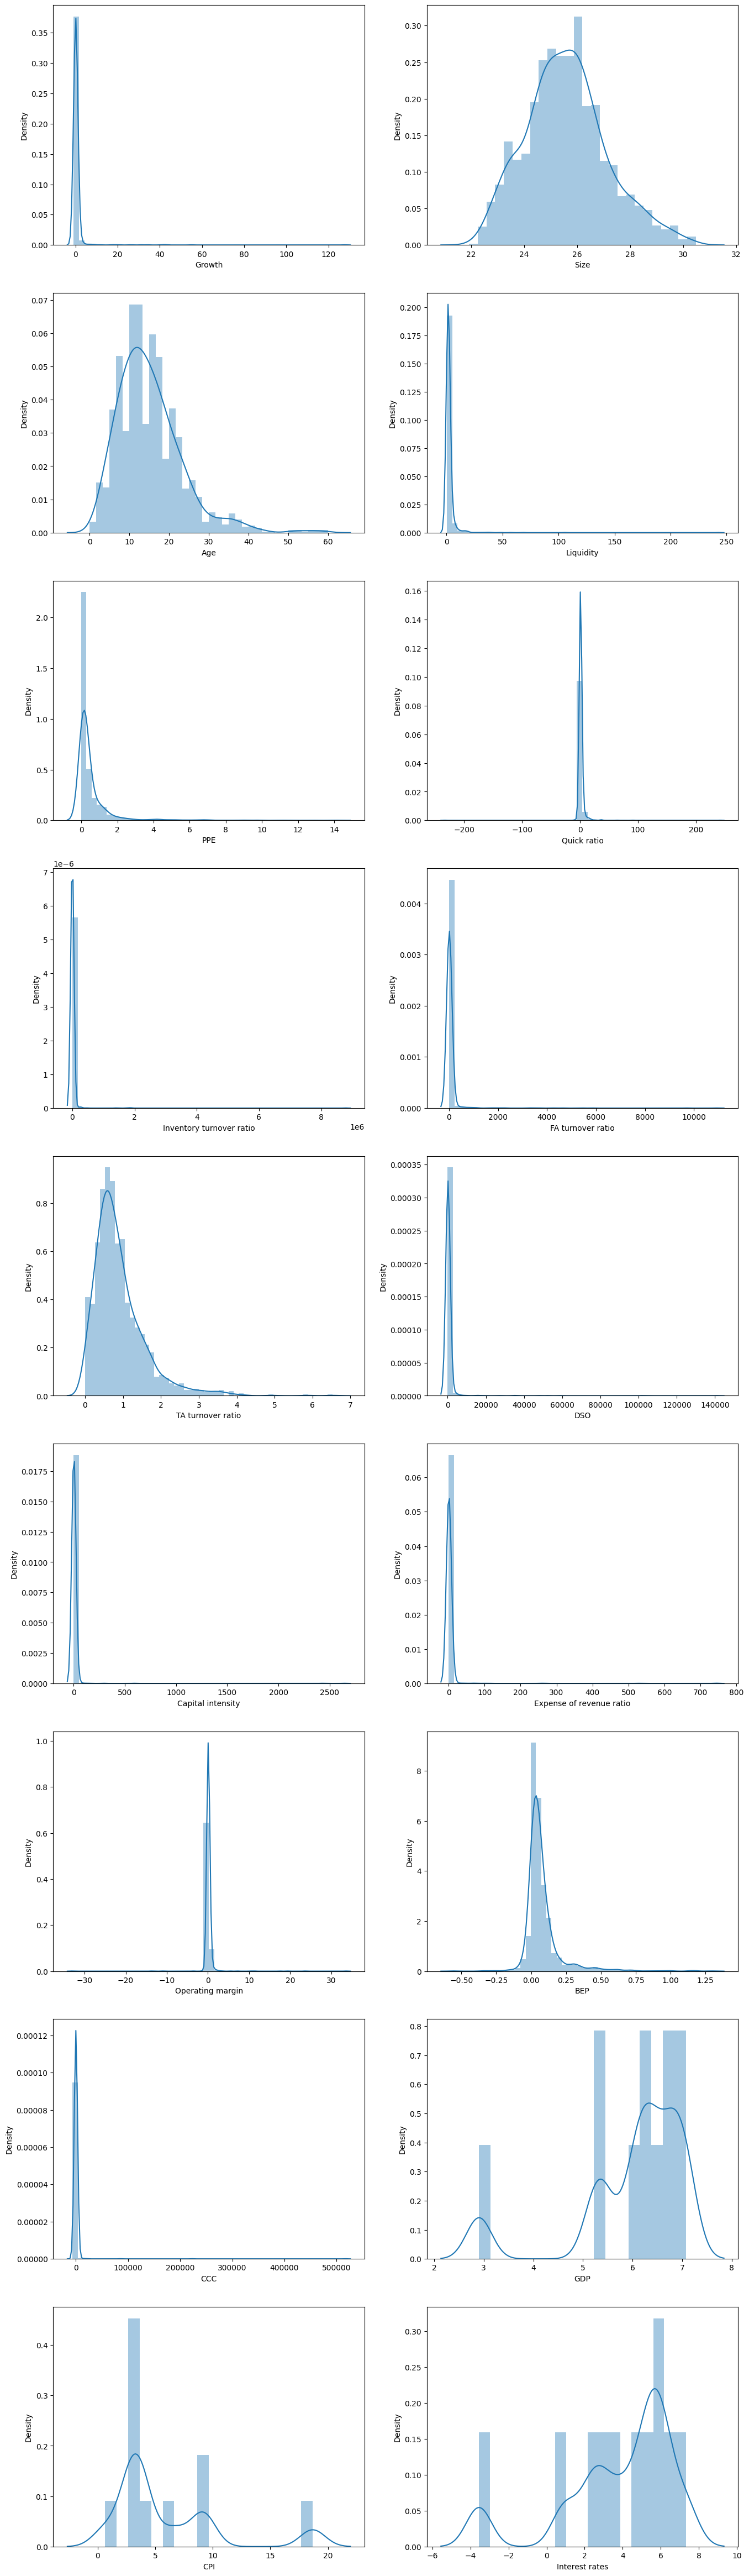

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin','BEP', 'CCC', 'GDP', 'CPI', 'Interest rates'])

In [ ]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,1584.000000,1607.000000,1615.000000,1625.000000,1669.000000,1582.000000,1628.000000,1625.000000,1623.000000,1625.000000,1623.000000,1625.000000,1625.000000,1625.000000,1628.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,25.598426,0.255721,0.467632,2.146398,15.088676,1.584767,3948.183366,36.590890,0.903503,371.601668,3.284671,1.776747,0.135583,0.077781,346.676502,6.001623,5.821202,3.797918,0.354067
std,1.536242,1.329318,0.761910,2.900046,8.284396,3.244638,44652.697865,162.002351,0.681964,1505.855685,15.174716,7.088603,0.489600,0.131343,2043.235527,1.131298,4.810290,2.944813,0.478373
min,21.917188,-0.997369,0.000000,0.097129,0.000000,-26.598137,0.007903,0.004599,0.000379,0.001316,0.153116,0.000000,-4.662168,-0.556457,-6519.856273,2.905836,0.631201,-3.551709,0.000000
25%,24.569149,-0.120141,0.072409,1.108808,9.000000,0.596980,2.224597,1.916329,0.468413,46.389985,0.866410,0.465958,0.023896,0.017572,60.397125,5.421883,2.795824,2.294892,0.000000
50%,25.530852,0.072588,0.177311,1.350896,14.000000,0.948661,4.610812,5.915814,0.742405,110.565406,1.346974,0.792069,0.058132,0.045961,152.695853,6.240303,3.539628,4.825874,0.000000
75%,26.521661,0.261643,0.458577,1.905768,19.000000,1.459089,15.576000,14.783666,1.154189,234.582427,2.134869,1.226824,0.131051,0.090089,271.797815,6.812246,9.094703,5.814896,1.000000
max,30.483757,13.214978,3.922197,24.989526,60.000000,29.929886,715145.589600,1508.200638,6.531007,16087.330642,277.980305,95.675362,4.988493,1.292267,43130.893975,7.075789,18.677732,7.322258,1.000000


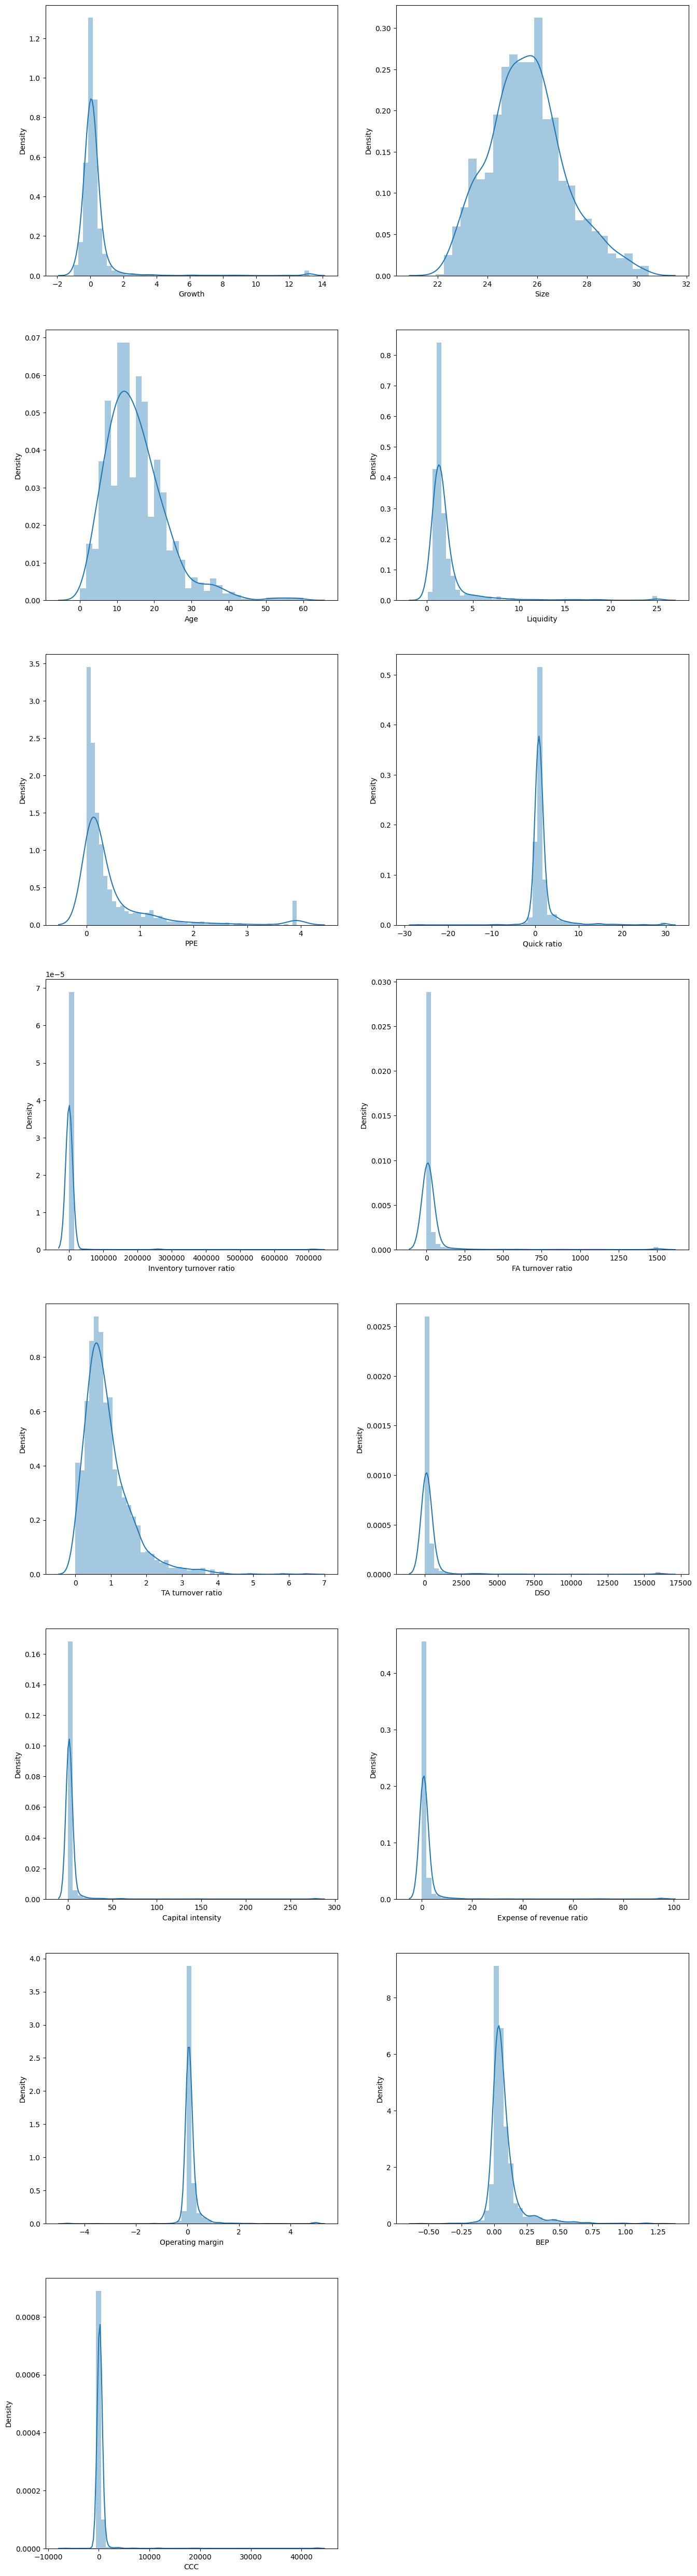

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP', 'CCC'])

In [ ]:
(data.isnull().sum()/1056*100).sort_values(axis=0, ascending=False)

Quick ratio                 8.522727
Size                        8.333333
Growth                      6.155303
PPE                         5.397727
Capital intensity           4.640152
TA turnover ratio           4.640152
BEP                         4.450758
Operating margin            4.450758
Expense of revenue ratio    4.450758
DSO                         4.450758
FA turnover ratio           4.450758
Liquidity                   4.450758
Inventory turnover ratio    4.166667
CCC                         4.166667
Age                         0.284091
GDP                         0.000000
CPI                         0.000000
Interest rates              0.000000
Target                      0.000000
dtype: float64

<Axes: >

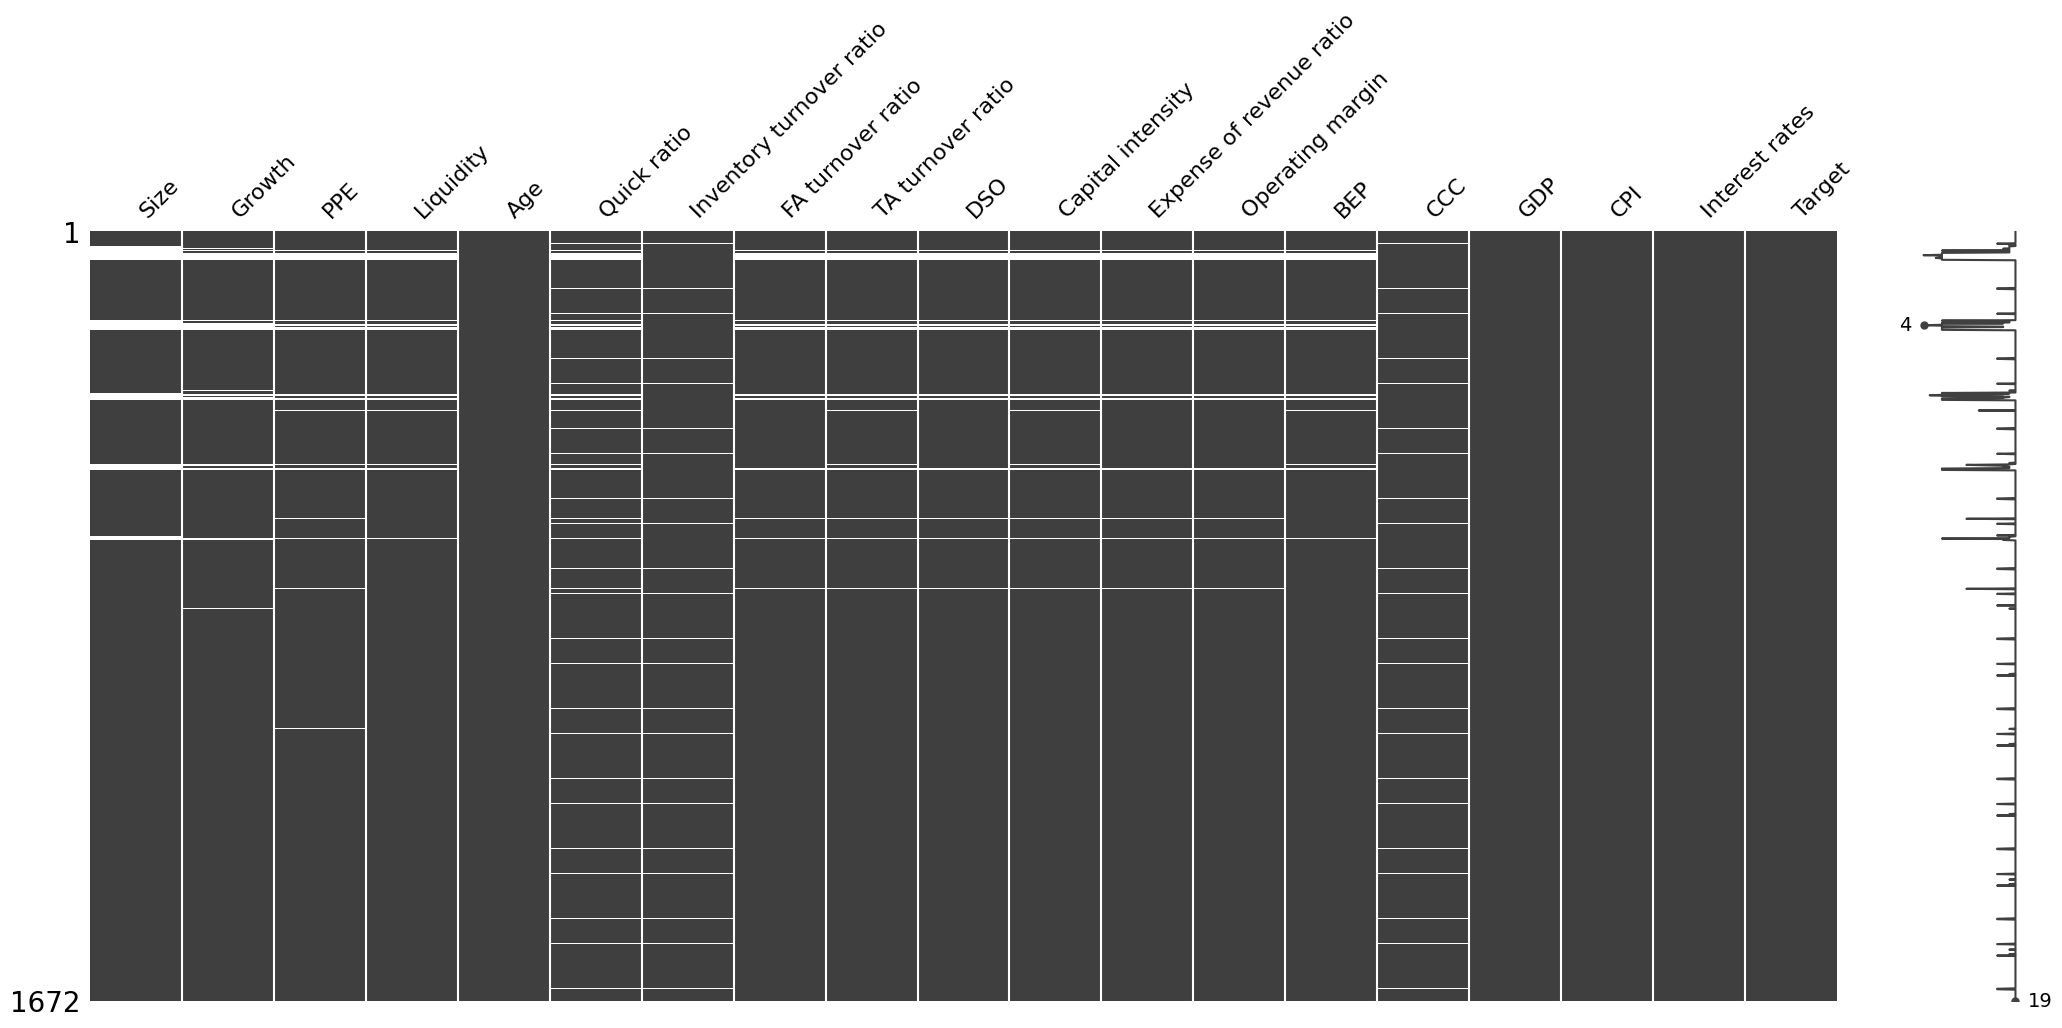

In [ ]:
import missingno

missingno.matrix(data)

In [ ]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(1528, 19)
0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from sklearn import preprocessing

X = new_data.drop('Target', axis=1)
y = new_data.Target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


Logistic regression:
[[170  30]
 [ 45  61]]
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       200
         1.0       0.67      0.58      0.62       106

    accuracy                           0.75       306
   macro avg       0.73      0.71      0.72       306
weighted avg       0.75      0.75      0.75       306



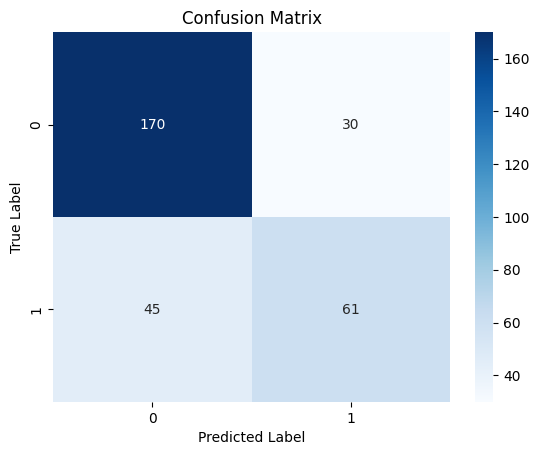

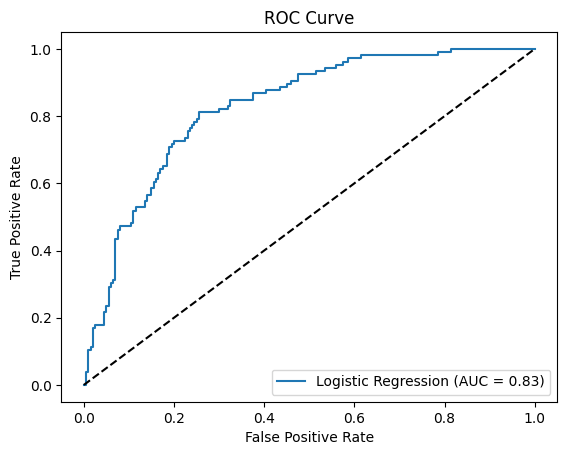

LogisticRegression(random_state=38)

In [ ]:
#baseline
def baseline_model(X_train, y_train, X_test, y_test):
    baseline = LogisticRegression(random_state=38)
    baseline.fit(X_train, y_train)

    # predict on test set
    y_pred_baseline = baseline.predict(X_test)

    # print evaluation metrics
    print("\nLogistic regression:")
    print(confusion_matrix(y_test, y_pred_baseline))
    print(classification_report(y_test, y_pred_baseline))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, cmap="Blues", fmt="d",
                    xticklabels=["0", "1"],
                    yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # predict probabilities for test set
    y_pred_prob_baseline = baseline.predict_proba(X_test)[:, 1]

    # calculate ROC-AUC score
    roc_auc_baseline = roc_auc_score(y_test, y_pred_prob_baseline)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_baseline)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_baseline))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return baseline
#baseline report
baseline_model(X_train, y_train, X_test, y_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [ ]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 75.49%
K-Nearest Neighbors: 75.82%
Decision Tree: 76.14%
Support Vector Machine (Linear Kernel): 75.16%
Support Vector Machine (RBF Kernel): 82.03%
Neural Network: 82.35%
Random Forest: 85.29%


In [ ]:
y_test.value_counts() / len(y_test)

0.0    0.653595
1.0    0.346405
Name: Target, dtype: float64

In [ ]:
y.value_counts() / len(y)

0.0    0.639398
1.0    0.360602
Name: Target, dtype: float64

Best parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best cross-validation score: 0.84

Random Forest:
[[176  24]
 [ 32  74]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       200
         1.0       0.76      0.70      0.73       106

    accuracy                           0.82       306
   macro avg       0.80      0.79      0.79       306
weighted avg       0.81      0.82      0.82       306



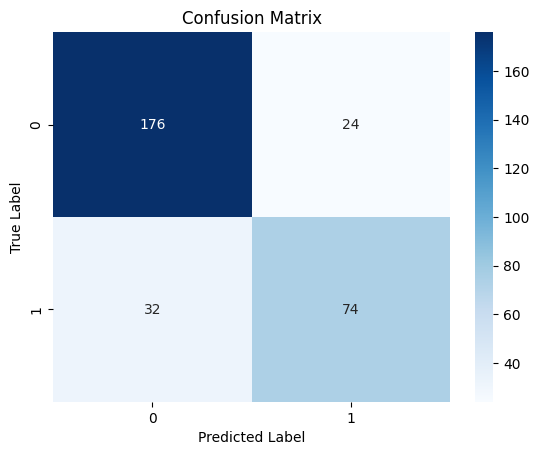

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=10,
                       random_state=38)

In [ ]:
def random_forest_tuning(X_train, y_train, X_test, y_test):
# define parameter grid
    param_grid = {'n_estimators': [10],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)}
    # create grid search object
    grid = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5, scoring='accuracy')

    # fit grid search object to data
    grid.fit(X_train, y_train)

    # print results
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))

    # use best parameters to fit model to data
    rf = grid.best_estimator_
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred_rf = rf.predict(X_test)

    # print evaluation metrics
    print("\nRandom Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return rf

random_forest_tuning(X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 96 that accuracy is 0.823319404264438


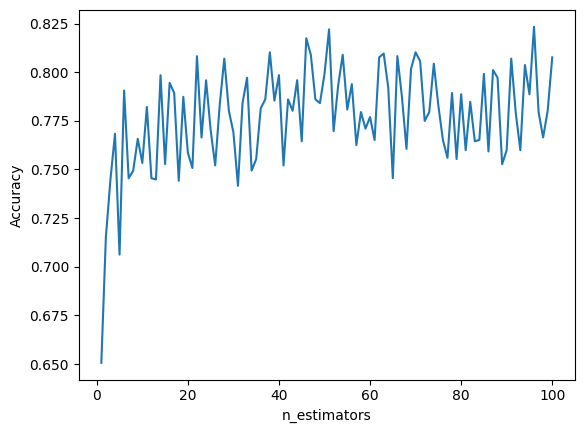

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 96 that accuracy is 0.823319404264438


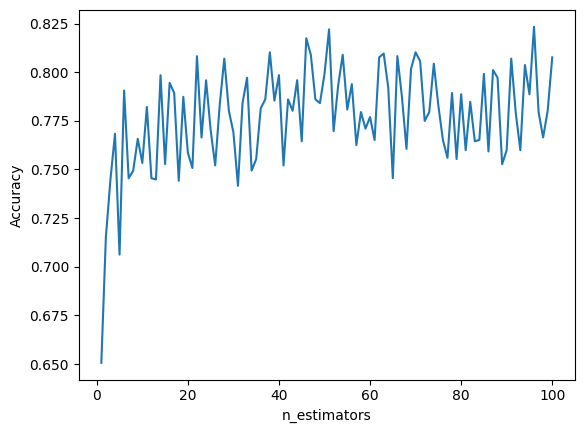

In [ ]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

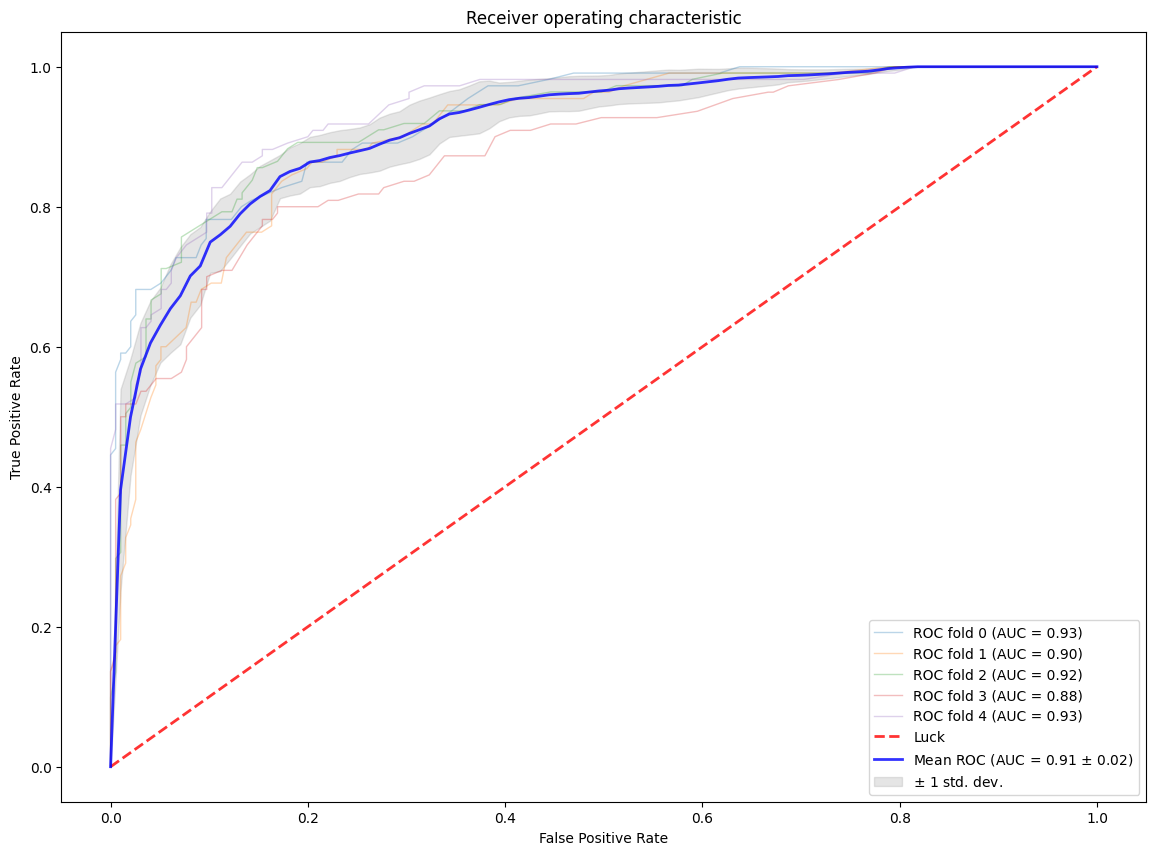

,AUC Train,AUC Test
0,1.0,0.927783
1,1.0,0.902945
2,1.0,0.922037
3,1.0,0.876923
4,1.0,0.934802


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

Size                        0.121645
Liquidity                   0.097851
BEP                         0.095825
Inventory turnover ratio    0.092781
Quick ratio                 0.071752
Growth                      0.065409
TA turnover ratio           0.050901
Operating margin            0.050005
Capital intensity           0.049407
CCC                         0.048982
Age                         0.044585
PPE                         0.041354
FA turnover ratio           0.039410
DSO                         0.038825
Expense of revenue ratio    0.036620
Interest rates              0.020537
CPI                         0.018240
GDP                         0.015870
dtype: float64


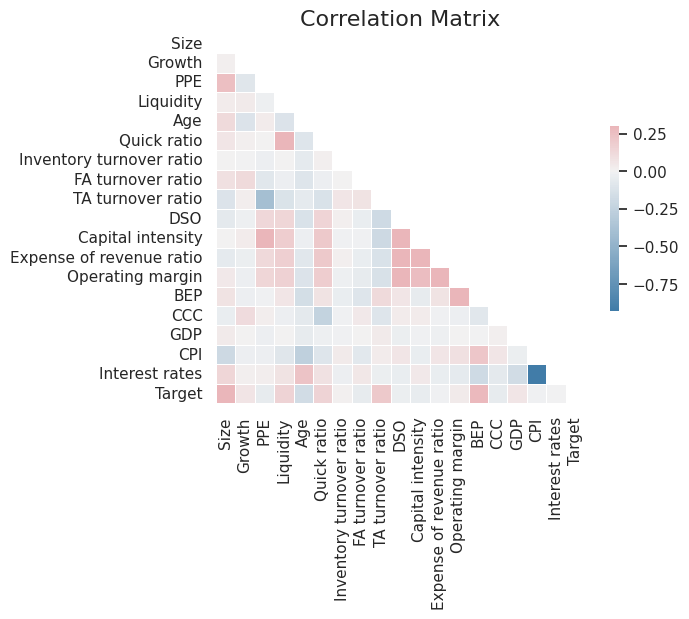

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

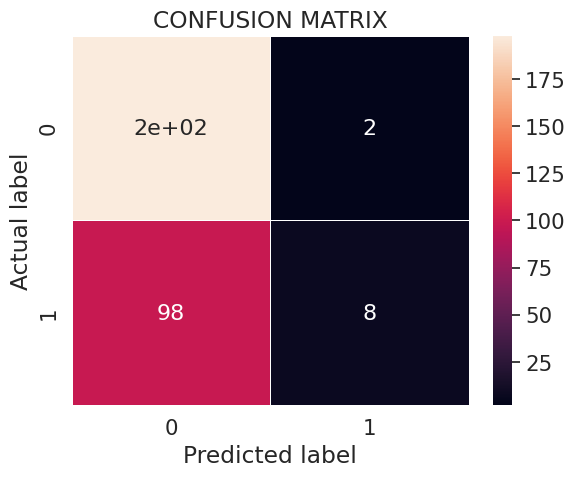

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80       200
         1.0       0.80      0.08      0.14       106

    accuracy                           0.67       306
   macro avg       0.73      0.53      0.47       306
weighted avg       0.71      0.67      0.57       306



In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.